In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


# Prob 4. 

### a.

Calculating the eigenvalues of my matrix

In [14]:
# Construct P
P  =np.mat(np.zeros([5,5])) 
P[:3,3]=1
P[3,4]=1
P[4,3] = 1
d = .85
P = d*P + (1-d)*np.ones([5,5])/5
print(P)

[[ 0.03  0.03  0.03  0.88  0.03]
 [ 0.03  0.03  0.03  0.88  0.03]
 [ 0.03  0.03  0.03  0.88  0.03]
 [ 0.03  0.03  0.03  0.03  0.88]
 [ 0.03  0.03  0.03  0.88  0.03]]


Calculate eigenvalues and vectors of P transpose and print out the normalized steady state eigenvector

In [15]:
eig_val, eig_vects = np.linalg.eig(P.T)
max_eig = np.argmax(eig_val)
print(np.real_if_close(eig_vects[:,max_eig])/np.sum(np.real_if_close(eig_vects[:,max_eig])))

[[ 0.03      ]
 [ 0.03      ]
 [ 0.03      ]
 [ 0.47567568]
 [ 0.43432432]]


In [5]:
start_vect = np.mat(np.zeros([5,1]).T)
start_vect[:] =1/5
print(start_vect)

[[ 0.2  0.2  0.2  0.2  0.2]]


In [6]:
N =100

np.matmul(np.linalg.matrix_power(P.T,N) ,start_vect.T)

matrix([[ 0.03      ],
        [ 0.03      ],
        [ 0.03      ],
        [ 0.47567565],
        [ 0.43432435]])

### c. Simulated websurfer

In [11]:
states = ['A','B','C','D','E']
state_dict = {'A':0,'B':1,'C':2,'D':3,'E':4}
state = 'C'
n_it = 1000
state_count = np.zeros([n_it,5])
state_count[0,2]=1
P = np.array(P)
for i in range(1,n_it):
    if state == 'A':
        state = states[np.random.choice(5,p=P[0,:])]
    elif state == 'B':
        state = states[np.random.choice(5,p=P[1,:])]
    elif state == 'C':
        state = states[np.random.choice(5,p=P[2,:])]
    elif state == 'D':
        state = states[np.random.choice(5,p=P[3,:])]
    elif state == 'E':
        state = states[np.random.choice(5,p=P[4,:])]
    state_count[i] = 0+state_count[i-1]
    state_count[i,state_dict[state]] += 1


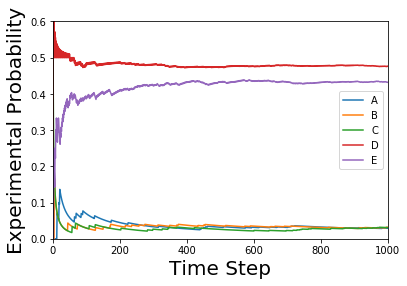

In [12]:
x = np.arange(1,n_it+1)
plt.plot(state_count[:,0]/x,label='A')
plt.plot(state_count[:,1]/x,label='B')
plt.plot(state_count[:,2]/x,label='C')
plt.plot(state_count[:,3]/x,label='D')
plt.plot(state_count[:,4]/x,label='E')
plt.legend()
plt.xlim([1,n_it])
plt.ylim([0,.6])
plt.ylabel(r'Experimental Probability',fontsize=20)
plt.xlabel('Time Step',fontsize=20)
plt.show()

### WOW! exponential convergence just like we predicted in class.

No I'll plot just the curve for C to consider the question

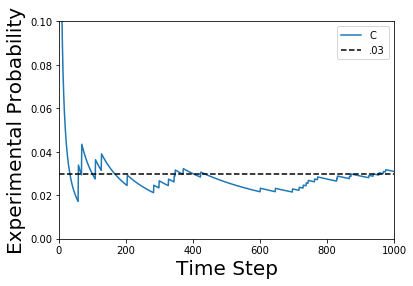

In [21]:
x = np.arange(1,n_it+1)
plt.plot(state_count[:,2]/x,label='C')
plt.xlim([1,n_it])
plt.ylim([0,.1])
plt.axhline(.03,linestyle = '--',color='black',label='.03')
plt.ylabel(r'Experimental Probability',fontsize=20)
plt.xlabel('Time Step',fontsize=20)
plt.legend()

plt.show()

A random walker definitely seems to converge to the .03 I predicted using the matrices. Seems my computers random number generator is not horribly biased.